In [1]:
import sys
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#data_file = sys.argv[1]
data_file ="data.csv"
data = pd.read_csv(data_file)

In [3]:
# ANOVA test, to see if any of the groups differ
anova = stats.f_oneway(data.iloc[:,0], data.iloc[:,1], data.iloc[:,2], data.iloc[:,3], data.iloc[:,4], data.iloc[:,5], data.iloc[:,6])
print(anova)
print(anova.pvalue)
#We conclude that yes: with p<0.5 , there is a difference between the means of the groups.

F_onewayResult(statistic=34.50409141249649, pvalue=1.5099431718361843e-36)
1.5099431718361843e-36


        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
        merge1 partition_sort  -0.0058  0.001 -0.0076  -0.004   True
        merge1            qs1  -0.0022 0.0073  -0.004 -0.0004   True
        merge1            qs2   0.0015 0.1855 -0.0003  0.0033  False
        merge1            qs3   0.0014 0.2414 -0.0004  0.0032  False
        merge1            qs4  -0.0009 0.7393 -0.0027  0.0009  False
        merge1            qs5  -0.0003    0.9 -0.0021  0.0015  False
partition_sort            qs1   0.0037  0.001  0.0019  0.0055   True
partition_sort            qs2   0.0073  0.001  0.0055  0.0091   True
partition_sort            qs3   0.0072  0.001  0.0054   0.009   True
partition_sort            qs4    0.005  0.001  0.0032  0.0067   True
partition_sort            qs5   0.0055  0.001  0.0037  0.0073   True
           qs1            qs2   0.

c:\users\baike\appdata\local\programs\python\python38\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


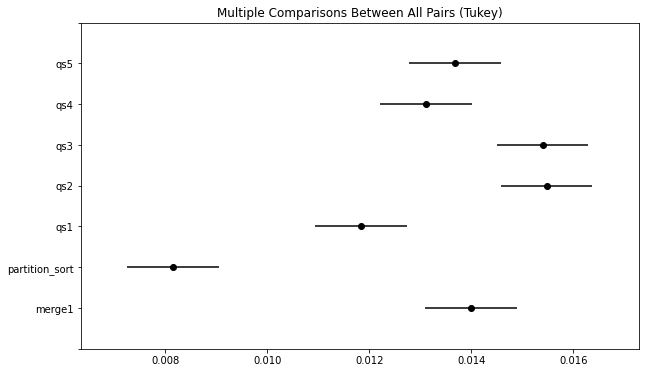

In [4]:
# Post Hoc Analysis
data_melt = pd.melt(data)
posthoc = pairwise_tukeyhsd(data_melt['value'], data_melt['variable'], alpha=0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()


c:\users\baike\appdata\local\programs\python\python38\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


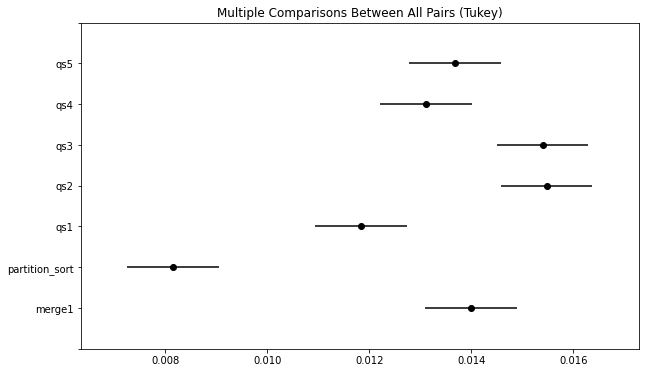

In [5]:
fig = posthoc.plot_simultaneous()


In [6]:
print(data.mean())

qs1               0.011841
qs2               0.015477
qs3               0.015400
qs4               0.013112
qs5               0.013686
merge1            0.014000
partition_sort    0.008158
dtype: float64
